# **Avocado Prediction Price**







###Proyek Pertama : Predictive Analytics

* Nama : Safiira Rahmah Linisa
* SIB ID : M248Y0537
* SIB Group : M02

#Data Loading

Pertama, Import Library yang Dibutuhkan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

Membaca dan melihat isi dataset

In [ ]:
avocado = pd.read_csv('/content/Avocado.csv')
avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


#Exploratory

Berikut ini variabel-variable yang terdapat dalam dataset

* Date: Tanggal Observasi
* AveragePrice: Harga Rata-rata satu buah Alpukat
* Total Volume: Jumalah Alpukat yang terjual
* 4046: Total jumlah alpukat terjual dengan PLU 4046
* 4225: Total jumlah alpukat terjual dengan PLU 4046
* 4770: Total jumlah alpukat terjual dengan PLU 4046
* Total Bags: Total jumlah sekantung alpukat yang terjual
* Small Bags: Kantung/wadah kecil yang terjual
* Large Bags: Kantung/wadah besar yang terjual
* XLarge Bags: Kantung/wadah ekstra besar yang terjual
* type: Jenis alpukat konvesional atau organik
* year: Tahun
* region: Kota atau wilayah obeservasi

## Informasi Dataset

Untuk melihat type data dan mengecek missing value pada dataset.

In [ ]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


## Melihat Informasi Statistik dari Dataset

In [ ]:
avocado.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


### Menangani missing value

In [ ]:
avocado.loc[(avocado['Total Bags']==0)]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9212,34,2015-05-03,2.03,3976.19,1325.62,2650.57,0.00,0.0,0.0,0.0,0.0,organic,2015,Atlanta
11024,26,2015-06-28,1.53,41116.32,7314.21,33780.38,21.73,0.0,0.0,0.0,0.0,organic,2015,Portland
11320,10,2015-10-18,2.79,12642.11,961.55,11680.56,0.00,0.0,0.0,0.0,0.0,organic,2015,SanFrancisco
11321,11,2015-10-11,2.66,14031.73,1046.84,12984.89,0.00,0.0,0.0,0.0,0.0,organic,2015,SanFrancisco
11333,23,2015-07-19,2.36,19558.81,3893.65,15665.16,0.00,0.0,0.0,0.0,0.0,organic,2015,SanFrancisco
11347,37,2015-04-12,1.54,28220.45,18887.66,9332.79,0.00,0.0,0.0,0.0,0.0,organic,2015,SanFrancisco
11348,38,2015-04-05,1.55,26530.70,17104.69,9426.01,0.00,0.0,0.0,0.0,0.0,organic,2015,SanFrancisco
11387,25,2015-07-05,1.98,29929.57,8841.34,20807.76,280.47,0.0,0.0,0.0,0.0,organic,2015,Seattle
11388,26,2015-06-28,1.71,46229.47,8112.46,37972.31,144.70,0.0,0.0,0.0,0.0,organic,2015,Seattle
11594,24,2015-07-12,2.07,2786.45,680.60,2105.85,0.00,0.0,0.0,0.0,0.0,organic,2015,Spokane


In [ ]:
# Drop baris dengan nilai 'Total Bags','Small Bags','Large Bags' = 0
avocado = avocado.loc[(avocado[['Total Bags','Small Bags','Large Bags']]!=0).all(axis=1)]
 
# Cek ukuran data untuk memastikan baris sudah di-drop
avocado.shape

(15735, 14)

##Deteksi outlier

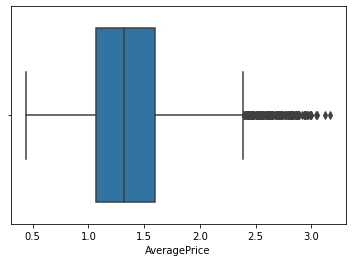

In [ ]:
sns.boxplot(x=avocado['AveragePrice'])

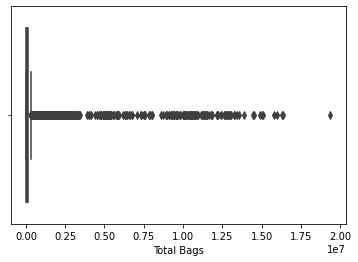

In [ ]:
sns.boxplot(x=avocado['Total Bags'])

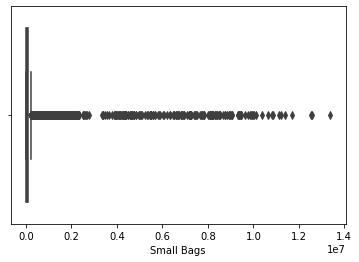

In [ ]:
sns.boxplot(x=avocado['Small Bags'])

Menangani Outlier dengan IQR Methode

In [ ]:
Q1 = avocado.quantile(0.25)
Q3 = avocado.quantile(0.75)
IQR=Q3-Q1
avocado=avocado[~((avocado<(Q1-1.5*IQR))|(avocado>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
avocado.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


(9977, 14)

## Univariate Analysis

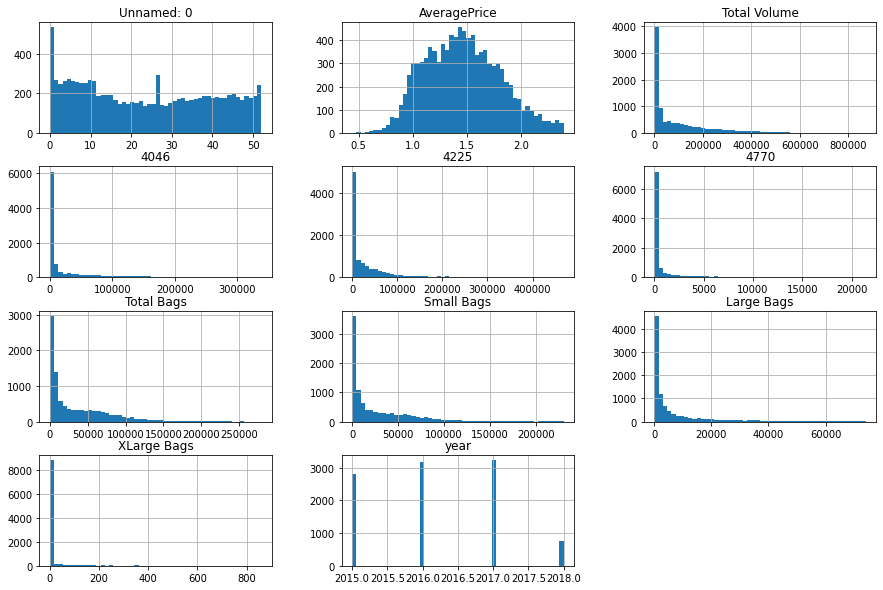

In [ ]:
avocado.hist(bins=50, figsize=(15, 10))
plt.show()

## Multivariet Analysis

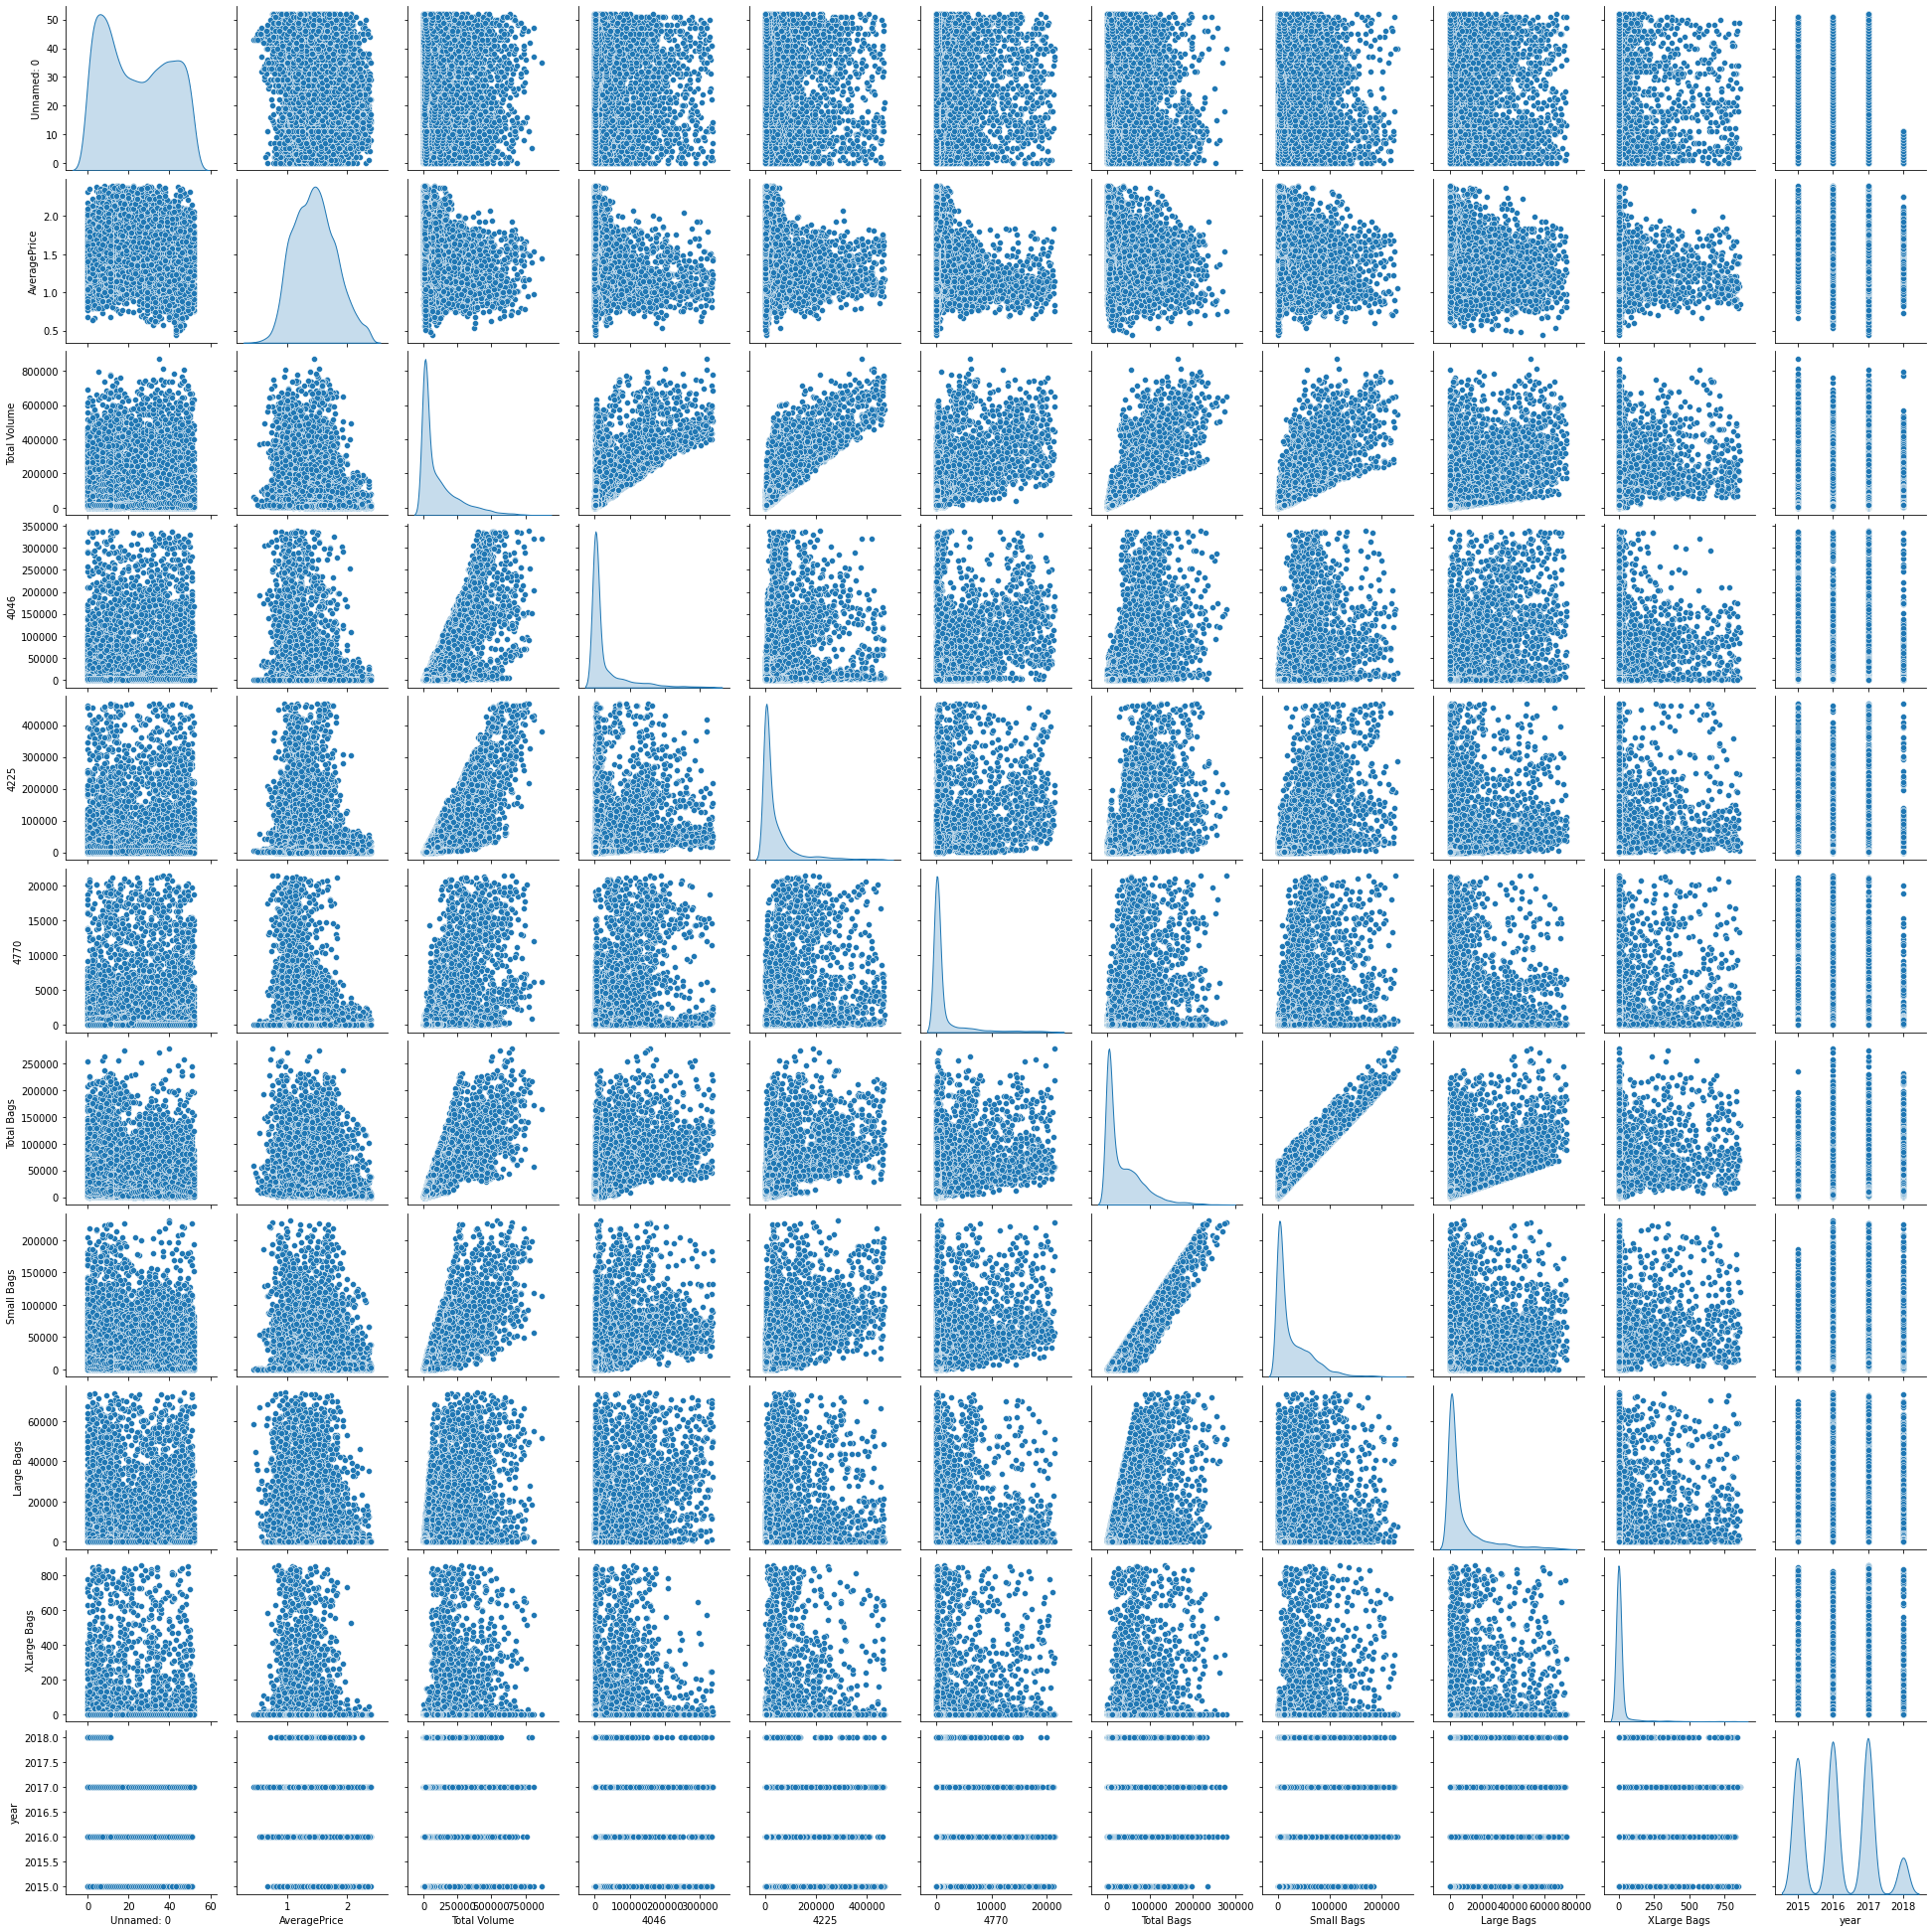

In [ ]:
sns.pairplot(avocado, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

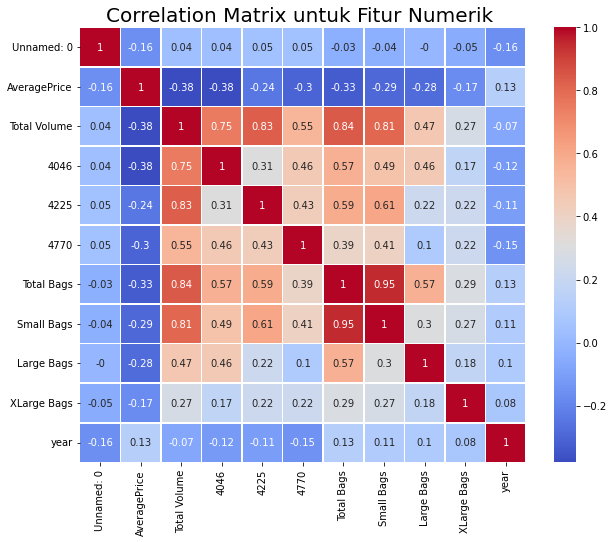

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = avocado.corr().round(2)
 
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

# Data Preparation

Menghapus atribut yang tidak sesuai dan tidak dibutuhkan.

In [ ]:
unused = ['XLarge Bags', 'year','Date','type','region']
avocado.drop(unused, axis=1, inplace=True)

In [ ]:
avocado

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69
...,...,...,...,...,...,...,...,...,...
18244,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85
18245,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80
18246,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31
18247,10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00


## Split Data
membagi dataset menjadi 80% data training dan 20% data testing

In [ ]:
from sklearn.model_selection import train_test_split
 
x = avocado.drop(['AveragePrice'],axis =1)
y = avocado['AveragePrice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

## Normalisasi Data

### Transformasi

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)

In [ ]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

# Model Deployment

##Training Model

**K-Nearest Neighbours**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
 
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(x_train), y_true=y_train)

**Random Forest**

In [ ]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
 
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(x_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(x_train), y_true=y_train)    

**Boosting**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(x_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(x_train), y_true=y_train)

# Model Evaluation

In [ ]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(x_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(x_test))/1e3
 
# Panggil mse
mse

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but AdaBoostRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,train,test
KNN,0.000039,0.000149
RF,0.000008,0.00018
Boosting,0.000079,0.000222


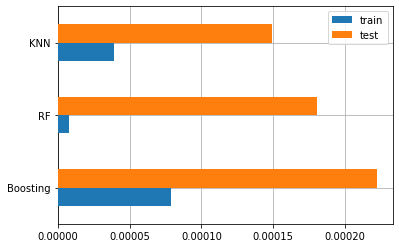

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Hasil visualisasi menunnjukan algoritma KNN memiliki nilai MSE paling kecil

In [ ]:
prediksi = _test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but AdaBoostRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
7295,1.44,1.4,1.3,1.1


Hasil prediksi menunjukkan algoritma KNN memiliki nilai prediksi paling sesuai. 